## Objectives:

 * Develop an intuitive understanding of linear regression
 * Know how to use scipy to perform linear regression

This notebook explores the methodological and practical sides of two common data analysis techniques: linear regression and correlation.

We'll start with a simple example, which will be a fake (custom made) dataset in which temperature anomalies increases linearly with time.  We'll use numpy/scipy packages to add random noise to the linear temperature trend.

In [1]:
""" initialize the notebook """

%matplotlib inline
import netCDF4 as nc # load the netCDF library
import pylab as PP # load the plotting library
import matplotlib as mpl # import matplotlib
import datetime as dt # import the datetime libarary for date handling
import scipy.stats # get the stats library
from numpy import * # load numpy

#Set the default font for plots
font = { 'family' : 'sans-serif', \
         'size' : '15', \
         'weight' : 'bold'}
mpl.rc('font', **font)

# define a function to plot temperature vs time, since we'll do this repeatedly in the notebook
def plot_temp_vs_time(time,temp,show=True):
    """ Plot temperature vs time. """
    
    fig,ax = PP.subplots(figsize=(10,6))
    
    ax.plot(time,temp,'k.')
    
    ax.set_xlabel('Time [years]')
    ax.set_ylabel('Temperature [K]')
    
    ax.set_ylim([-5,5])
    
    if show:
        PP.show()
    else:   
        return ax

def line(time,slope):
    return slope*(time - time[0])

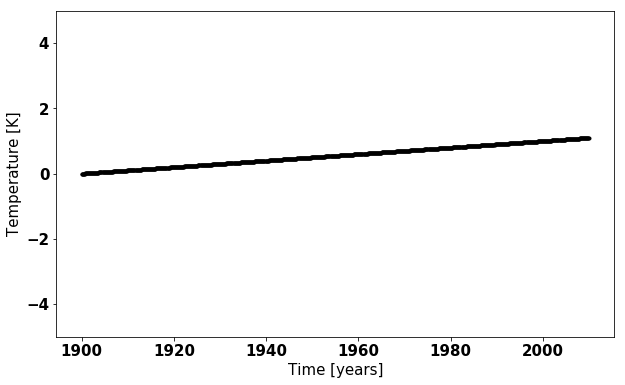

In [2]:
# create a 'time' variable with 1000 evenly spaced values between the 1900 and 2010
years = linspace(1900,2010,1000)

# set the slope of the temperature anomaly line
temp_slope = 0.01

# create the temperature line
temp_anom = line(years,temp_slope)

# plot the line
plot_temp_vs_time(years,temp_anom)

Now let's add some randomness to this line to make it look more like 'real' data.

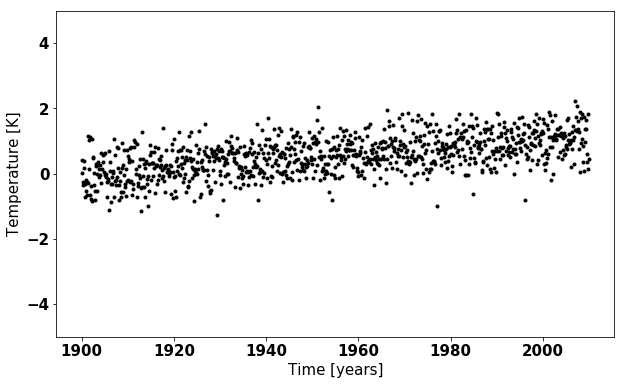

In [3]:
""" Add some noise """

# generate random noise
random_noise = scipy.stats.norm.rvs(loc=0,scale=0.5,size=len(temp_anom))

# add the noise to the temperature trend
temp_anom_noisy = temp_anom + random_noise

# plot the line
plot_temp_vs_time(years,temp_anom_noisy)

Now let's draw a few lines on the graph, one of them will 'go through' the data.



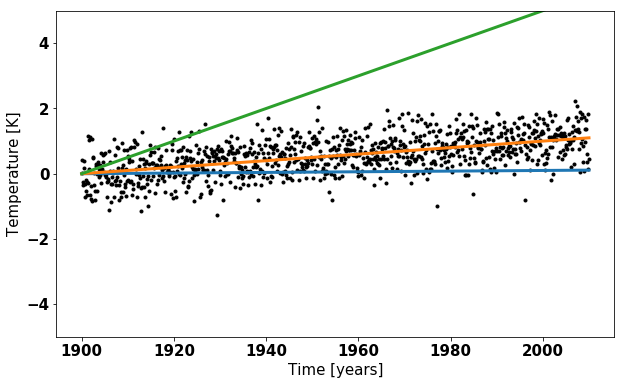

In [4]:
# plot the noisy data again (don't show this time
# since we want to add more lines to the plot)
ax = plot_temp_vs_time(years,temp_anom_noisy,show=False)

test_slopes = [0.001, 0.01, 0.05]
for slope in test_slopes:
    ax.plot(years,slope*(years-years[0]),linewidth=3)

PP.show()

# Least squares fitting

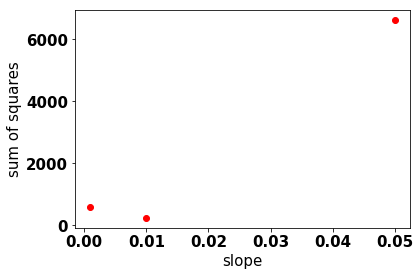

In [5]:
# this plot shows the sum of squares of (temp_anom_noisy - line)

sum_squares = []
for slope in test_slopes:
    sq_sum = sum((temp_anom_noisy - line(years,slope))**2)
    sum_squares.append(sq_sum)
    
PP.plot(test_slopes,sum_squares,'ro')
PP.xlabel('slope')
PP.ylabel('sum of squares')
PP.show()

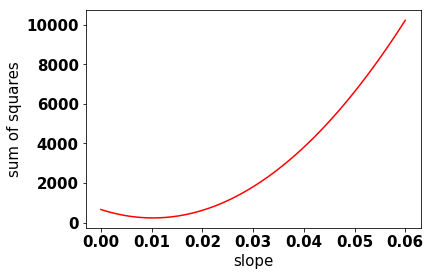

In [6]:
""" lets be a bit more systematic -- trying more slopes """

slope_vector = linspace(0,0.06,100)

sum_squares = []
for slope in slope_vector:
    sq_sum = sum((temp_anom_noisy - line(years,slope))**2)
    sum_squares.append(sq_sum)
    
PP.plot(slope_vector,sum_squares,'r-')
PP.xlabel('slope')
PP.ylabel('sum of squares')
PP.show()

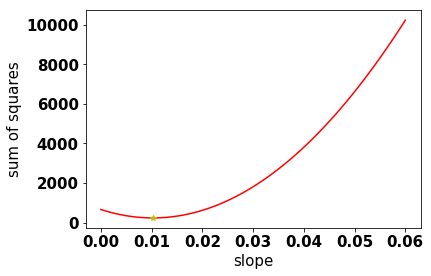

In [7]:
""" Now let's see what slope comes back from a linear regression """

fit_slope, fit_intercept,_,_,_ = scipy.stats.linregress(years,temp_anom_noisy)

sqsum = sum((temp_anom_noisy - line(years,fit_slope))**2)

# where does this slope plot 
PP.plot(slope_vector,sum_squares,'r-')
PP.plot(fit_slope,sqsum,'y*')
PP.xlabel('slope')
PP.ylabel('sum of squares')
PP.show()

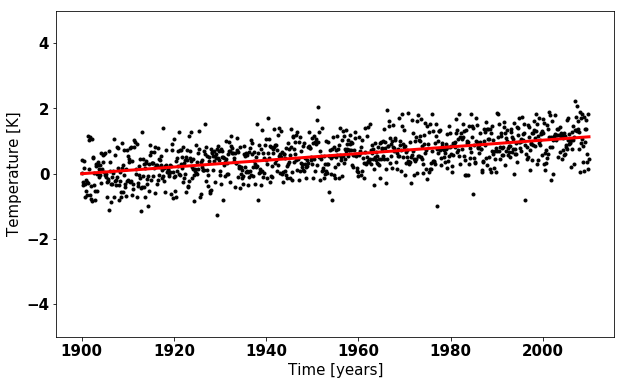

In [8]:
# plot the noisy data again
ax = plot_temp_vs_time(years,temp_anom_noisy,show=False)

ax.plot(years,line(years,fit_slope),'r-',linewidth=3)

PP.show()